In [127]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import csv
import os

# Imports the method used for connecting to DBs
from sqlalchemy import create_engine, MetaData

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float

import pandas as pd 
import matplotlib.pyplot as plt 




In [128]:
#Data common to macro level - Bay Area and Micro level - Counties.

#InterestRates - Data goes back to 1963 
InterestRatesDf =  pd.read_csv(os.path.join("resources","HistoricalData","FHFB_Historical_InterestRates.csv"))

#InterestRatesDf["Year"] = InterestRatesDf["Year"].apply(np.round)
#InterestRatesDf.Year.astype(float).round().astype(int)
InterestRatesDf = InterestRatesDf[["Year","Effective_Rate"]]
InterestRatesDf =InterestRatesDf.rename(columns = {"Effective_Rate": "Interest_Rate"})
InterestRatesDf = InterestRatesDf.dropna()
InterestRatesDf["Year"] = InterestRatesDf.Year.astype(float).round().astype(int)
InterestRatesDf = InterestRatesDf[InterestRatesDf.Year> 1989]
InterestRatesDf.set_index('Year',inplace = True)

In [129]:

#County level data#County l 

##HousingAffordabilityIndex: Percent of population that can afford to buy a home priced at the median price level 
##- goes back to 1991
########Data for Napa and Solana counties is avaliable only from 2010.

HousingAffordavilityIndexMonthlyDf = pd.read_csv(os.path.join("resources","HistoricalData","Historical_Housing_Affordability_BayAreaCounties.csv"))

HousingAffordavilityIndexMonthlyAlmedaDf = HousingAffordavilityIndexMonthlyDf[["Month/QTR","Alameda","Year"]]
HousingAffordavilityIndexMonthlyAlmedaDf = HousingAffordavilityIndexMonthlyAlmedaDf.dropna()
HousingAffordavilityIndexMonthlyAlmedaDf["Year"] = HousingAffordavilityIndexMonthlyAlmedaDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlyContraCostaDf = HousingAffordavilityIndexMonthlyDf[["Month/QTR","Contra Costa","Year"]]
HousingAffordavilityIndexMonthlyContraCostaDf = HousingAffordavilityIndexMonthlyContraCostaDf.dropna()
HousingAffordavilityIndexMonthlyContraCostaDf["Year"] = HousingAffordavilityIndexMonthlyContraCostaDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlyMarinDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Marin","Year"]]
HousingAffordavilityIndexMonthlyMarinDf = HousingAffordavilityIndexMonthlyMarinDf.dropna()
HousingAffordavilityIndexMonthlyMarinDf["Year"] = HousingAffordavilityIndexMonthlyMarinDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlyNapaDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Napa","Year"]]
HousingAffordavilityIndexMonthlyNapaDf = HousingAffordavilityIndexMonthlyNapaDf.dropna()
HousingAffordavilityIndexMonthlyNapaDf["Year"] = HousingAffordavilityIndexMonthlyNapaDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySanFranciscoDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","San Francisco","Year"]]
HousingAffordavilityIndexMonthlySanFranciscoDf = HousingAffordavilityIndexMonthlySanFranciscoDf.dropna()
HousingAffordavilityIndexMonthlySanFranciscoDf["Year"] = HousingAffordavilityIndexMonthlySanFranciscoDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySanMateoDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","San Mateo","Year"]]
HousingAffordavilityIndexMonthlySanMateoDf = HousingAffordavilityIndexMonthlySanMateoDf.dropna()
HousingAffordavilityIndexMonthlySanMateoDf["Year"] = HousingAffordavilityIndexMonthlySanMateoDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySantaClaraDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Santa Clara","Year"]]
HousingAffordavilityIndexMonthlySantaClaraDf = HousingAffordavilityIndexMonthlySantaClaraDf.dropna()
HousingAffordavilityIndexMonthlySantaClaraDf["Year"] = HousingAffordavilityIndexMonthlySantaClaraDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySolanoDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Solano","Year"]]
HousingAffordavilityIndexMonthlySolanoDf = HousingAffordavilityIndexMonthlySolanoDf.dropna()
HousingAffordavilityIndexMonthlySolanoDf["Year"] = HousingAffordavilityIndexMonthlySolanoDf.Year.astype(float).round().astype(int)

HousingAffordavilityIndexMonthlySonomaDf=HousingAffordavilityIndexMonthlyDf[["Month/QTR","Sonoma","Year"]]
HousingAffordavilityIndexMonthlySonomaDf = HousingAffordavilityIndexMonthlySonomaDf.dropna()
HousingAffordavilityIndexMonthlySonomaDf["Year"] = HousingAffordavilityIndexMonthlySonomaDf.Year.astype(float).round().astype(int)


HousingAffordavilityIndexMonthlyBayAreaDf= HousingAffordavilityIndexMonthlyDf[["Month/QTR","BayAreaAvg","Year"]]
HousingAffordavilityIndexMonthlyBayAreaDf = HousingAffordavilityIndexMonthlyBayAreaDf.dropna()
HousingAffordavilityIndexMonthlyBayAreaDf["Year"] = HousingAffordavilityIndexMonthlyBayAreaDf.Year.astype(float).round().astype(int)


# Population data goes back to 1960
PopulationCountyDf = pd.read_csv(os.path.join("resources","HistoricalData","Population_by_county.csv"))
PopulationCountyDf = PopulationCountyDf[["County","Year","Population"]]

PopulationAlmedaDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Alameda County"]
PopulationContraCostaDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Contra Costa County"]
PopulationMarinDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Marin County"]
PopulationNapaDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Napa County"]
PopulationSanFranciscoDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="San Francisco County"]
PopulationSanMateoDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="San Mateo County"]
PopulationSantaClaraDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Santa Clara County"]
PopulationSolanoDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Solano County"]
PopulationSonomaaDf = PopulationCountyDf.loc[PopulationCountyDf["County"] =="Sonoma County"]

#Housing Growrth - Number of new units added per year. Data goes back to 1990
HousingGrowthCountyDf = pd.read_csv(os.path.join("resources","HistoricalData","Housing_Production_by_county.csv"))
HousingGrowthCountyDf = HousingGrowthCountyDf[["County","Year","Total Annual Production"]]

HousingGrowthAlmedaDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Alameda County"]
HousingGrowthContraCostaDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Contra Costa County"]
HousingGrowthMarinDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Marin County"]
HousingGrowthNapaDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Napa County"]
HousingGrowthSanFranciscoDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="San Francisco County"]
HousingGrowthSanMateoDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="San Mateo County"]
HousingGrowthSantaClaraDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Santa Clara County"]
HousingGrowthSolanoDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Solano County"]
HousingGrowthSonomaDf = HousingGrowthCountyDf.loc[HousingGrowthCountyDf["County"] =="Sonoma County"]

#Median Housing Price

#Median prices of existing homes. Data goesback to 1990 . This might be a better measure of home prices (trends)
MedianHomePricesExistingDf = pd.read_csv(os.path.join("resources","HistoricalData","Annual_Home_Prices_by_county.csv"))

MedianHomePricesExistingDf

MedianHomePricesAlamedaDf = MedianHomePricesExistingDf[["Year", "Alameda"]]
MedianHomePricesContraCostaDf = MedianHomePricesExistingDf[["Year", "Contra Costa"]]
MedianHomePricesMarinDf = MedianHomePricesExistingDf[["Year", "Marin"]]
MedianHomePricesNapaDf = MedianHomePricesExistingDf[["Year", "Napa"]]
MedianHomePricesSanFranciscoDf = MedianHomePricesExistingDf[["Year", "San Francisco"]]
MedianHomePricesSanMateoDf = MedianHomePricesExistingDf[["Year", "San Mateo"]]
MedianHomePricesSantaClaraDf = MedianHomePricesExistingDf[["Year", "Santa Clara"]]
MedianHomePricesSolanoDf = MedianHomePricesExistingDf[["Year", "Solano"]]
MedianHomePricesSonomaDf = MedianHomePricesExistingDf[["Year", "Sonoma"]]

#Wage data
WagesDf = pd.read_csv(os.path.join("resources","HistoricalData","WageData_by_county.csv"))
WagesDf = WagesDf.rename(columns = {"Area": "County"})


WagesAlmedaDf = WagesDf.loc[WagesDf["County"] =="Alameda County, California"]
WagesContraCostaDf = WagesDf.loc[WagesDf["County"] =="Contra Costa County, California"]
WagesMarinDf = WagesDf.loc[WagesDf["County"] =="Marin County, California"]
WagesNapaDf = WagesDf.loc[WagesDf["County"] =="Napa County, California"]
WagesSanFranciscoDf = WagesDf.loc[WagesDf["County"] =="San Francisco County, California"]
WagesSanMateoDf = WagesDf.loc[WagesDf["County"] =="San Mateo County, California"]
WagesSantaClaraDf = WagesDf.loc[WagesDf["County"] =="Santa Clara County, California"]
WagesSolanoDf = WagesDf.loc[WagesDf["County"] =="Solano County, California"]
WagesSonomaDf = WagesDf.loc[WagesDf["County"] =="Sonoma County, California"]

In [163]:

#BayArea level data

# Read the data and cleaning it up


# Population data goes back to 1960
PopulationDf = pd.read_csv(os.path.join("resources","HistoricalData","Population_Bay_Area.csv"))
#Selecting records from PopulationDf where the Year >= 1989
PopulationDf = PopulationDf[PopulationDf.Year> 1989]
PopulationGrowthDf = PopulationDf
PopulationDf = PopulationDf[["Year","Population"]]

PopulationDf.set_index('Year',inplace = True)

#Housing Production - Number of new units added per year. Data goes back to 1990
HousingGrowthDf = pd.read_csv(os.path.join("resources","HistoricalData","Housing_Production_Bay_Area.csv"))
HousingGrowthDf = HousingGrowthDf[["Year","Total Annual Production"]]
HousingGrowthDf = HousingGrowthDf.rename(columns = {"Total Annual Production": "New Homes Constructed"})
HousingGrowthDf.set_index('Year',inplace = True)

#Median home prices. Data goes back to 1997. Stops at 2015. MedPrice_IA indicates median price adjusted for Inflation. 
MedianHomePricesDf = pd.read_csv(os.path.join("resources","HistoricalData","Home_Prices_Bay_Area.csv"))

#Median prices of existing homes. Data goesback to 1990 . This might be a better measure of home prices (trends)
MedianHomePricesExistingDf = pd.read_csv(os.path.join("resources","HistoricalData","MedianPricesofExistingDetachedHomesHistoricalData.csv"))

MedianHomePricesExistingAnnualDf = MedianHomePricesExistingDf.groupby(['Year']).agg({'S.F. Bay Area':['mean']})
MedianHomePricesExistingAnnualDf.reset_index(inplace = True)
MedianHomePricesExistingAnnualDf.columns=[''.join(col) for col in MedianHomePricesExistingAnnualDf.columns]

MedianHomePricesExistingAnnualDf["S.F. Bay Areamean"] = MedianHomePricesExistingAnnualDf["S.F. Bay Areamean"].astype(float).round().astype(int)
MedianHomePricesExistingAnnualDf= MedianHomePricesExistingAnnualDf.rename(columns = {"S.F. Bay Areamean":"Avg.Median Home price"})
#pd.DataFrame(MedianHomePricesExistingAnnualDf.to_records())
MedianHomePricesExistingAnnualDf.set_index('Year',inplace = True)

#HousingAffordabilityIndex: Percent of population that can afford to buy a home priced at the median price level - goes back to 1991
HousingAffordavilityIndexDf = pd.read_csv(os.path.join("resources","HistoricalData","Historical_Housing_Affordability_BayAreaCounties.csv"))
HAIExistingAnnualDf = HousingAffordavilityIndexDf.groupby(['Year']).agg({'BayAreaAvg':['mean']})
HAIExistingAnnualDf.reset_index(inplace = True)
HAIExistingAnnualDf.columns=[''.join(col) for col in HAIExistingAnnualDf.columns]
HAIExistingAnnualDf.set_index('Year',inplace = True)

#Rents 1970, 1980, 1990, 2000, 2006 to 2015
RentTrendsDf =  pd.read_csv(os.path.join("resources","HistoricalData","Rents_Bay_Area.csv"))

# Average Annual Wages, number of employers, number of employees -
# Data goes back to 1990
WagesGrpDf = WagesDf.groupby(['Year']).agg({'Num_Employers':['sum'],'Num_Employees':['sum'],'AvgAnnualPay' : ['mean']})

WagesGrpDf.reset_index(inplace = True)
WagesGrpDf.columns=[''.join(col) for col in WagesGrpDf.columns]
WagesBayAreaDf =WagesGrpDf.rename(columns ={'Num_Employerssum': "Employers", 'Num_Employeessum': "Employees", 'AvgAnnualPaymean' : "AvgAnnualPay"})

#PopulationDf
#WagesBayAreaDf
#HousingGrowthDf 
#MedianHomePricesExistingAnnualDf
#HAIExistingAnnualDf

#summaryDf  = PopulationDf

merdf1 = pd.merge(PopulationDf,WagesBayAreaDf,how = 'outer', on='Year')
merdf1.reset_index()
merdf1

merdf2 = pd.merge(HousingGrowthDf,MedianHomePricesExistingAnnualDf,how = 'outer', on='Year')
merdf2.reset_index()
merdf2

merdf3 = pd.merge(merdf1,merdf2,how = 'outer', on='Year')

BayAreaSummaryDf =  pd.merge(merdf3,InterestRatesDf,how = 'outer', on='Year')
BayAreaSummaryDf1 = BayAreaSummaryDf.dropna()
BayAreaSummaryDf = BayAreaSummaryDf.dropna()
BayAreaSummaryDf.set_index("Year",inplace = True)
BayAreaSummaryDf

#population growth Vs housing Growth 
PopulationGrowthDf = PopulationGrowthDf[["Year","PopulationGrowth"]]
PopHHGrowthDf  = pd.merge(PopulationGrowthDf,HousingGrowthDf,how = 'outer', on='Year')

PopulationGrowthDf.set_index('Year',inplace = True)
PopHHGrowthDf.set_index('Year',inplace = True)

BayAreaSummaryDf

,Population,Employers,Employees,AvgAnnualPay,New Homes Constructed,Avg.Median Home price,Interest_Rate
Year,,,,,,,
1990,6020147.0,160814.0,3029207.0,26827.111111,20165.0,232638,10.05
1991,6063929.0,184128.0,2942366.0,28240.444444,16396.0,234197,9.34
1992,6150405.0,195298.0,2887645.0,30080.888889,16857.0,233964,8.11
1993,6236622.0,202087.0,2879500.0,30708.555556,13781.0,232320,7.13
1994,6296661.0,199363.0,2900397.0,31565.111111,14482.0,238903,7.49
1995,6330094.0,214307.0,2964060.0,32787.777778,14371.0,239315,7.85
1996,6375868.0,211511.0,3078411.0,34109.444444,14641.0,247183,7.74
1997,6462873.0,205387.0,3182397.0,36455.222222,21330.0,268918,7.68
1998,6566673.0,225328.0,3303428.0,38529.555556,23432.0,300666,7.10


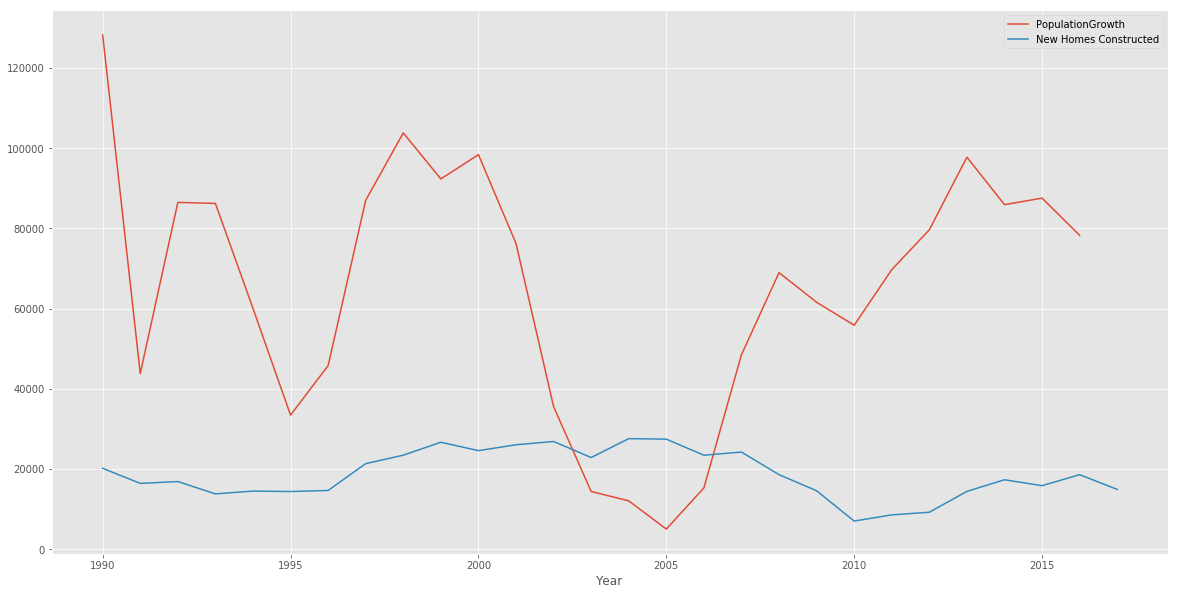

In [158]:
PopHHGrowthDf.plot(figsize=(20,10))


In [131]:
# Hypothesis : 

# The housing growth rate is not keeping up with the population growth rate and hence the increase in the median housing prices.

In [165]:

TestDf  = BayAreaSummaryDf.pct_change()
TestDf

,Population,Employers,Employees,AvgAnnualPay,New Homes Constructed,Avg.Median Home price,Interest_Rate
Year,,,,,,,
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,0.007273,0.144975,-0.028668,0.052683,-0.186908,0.006701,-0.070647
1992,0.014261,0.060664,-0.018598,0.065171,0.028117,-0.000995,-0.131692
1993,0.014018,0.034762,-0.002821,0.020866,-0.182476,-0.007027,-0.120838
1994,0.009627,-0.013479,0.007257,0.027893,0.050867,0.028336,0.050491
1995,0.005310,0.074959,0.021950,0.038735,-0.007665,0.001725,0.048064
1996,0.007231,-0.013047,0.038579,0.040310,0.018788,0.032877,-0.014013
1997,0.013646,-0.028954,0.033779,0.068772,0.456868,0.087931,-0.007752
1998,0.016061,0.097090,0.038031,0.056901,0.098547,0.118058,-0.075521


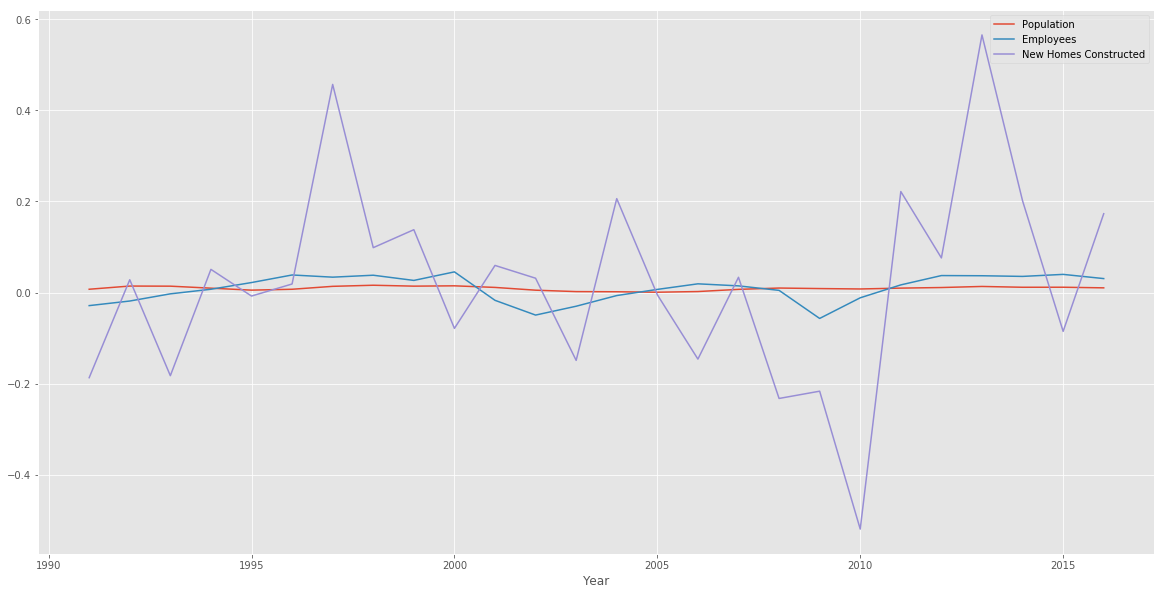

In [169]:
# Population Growth % Employment Growth % and Housing Production %
%matplotlib inline
#plt.figure(figsize=(20,10))
#PopulationDf
PopEmplNewHHMedianPriceDf  = BayAreaSummaryDf1[["Year","Population","Employees","New Homes Constructed"]]
PopEmplNewHHMedianPriceDf.set_index("Year",inplace = True)
PopEmplNewHHMedianPriceDfTestDf1 = PopEmplNewHHMedianPriceDf.pct_change()
PopEmplNewHHMedianPriceDfTestDf1.plot(figsize=(20,10))


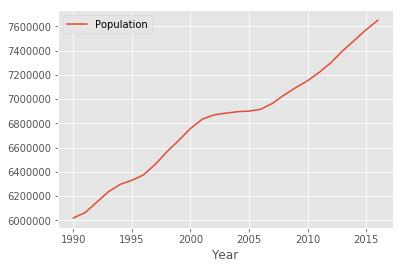

In [134]:
PopulationDf.plot()

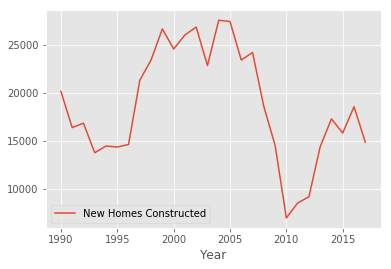

In [135]:
HousingGrowthDf.plot()

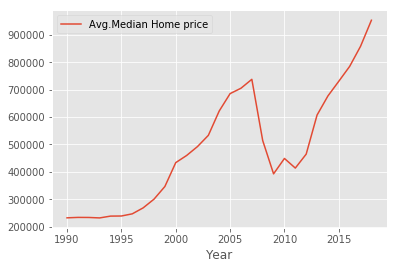

In [136]:
MedianHomePricesExistingAnnualDf.plot()

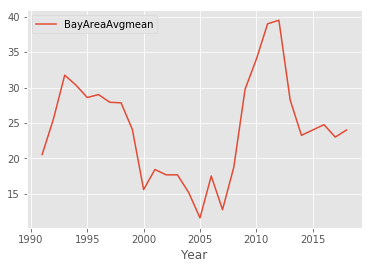

In [137]:
HAIExistingAnnualDf.plot()

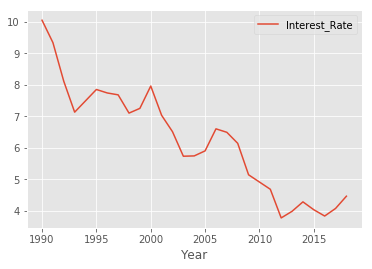

In [138]:
InterestRatesDf.plot()

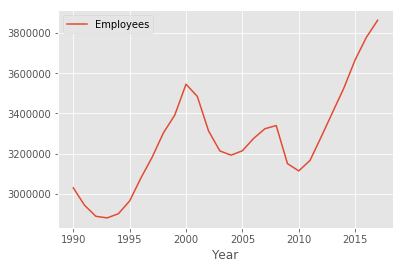

In [139]:
JobsDf = WagesBayAreaDf[["Year","Employees"]]
JobsDf.set_index("Year",inplace = True)
JobsDf.plot()

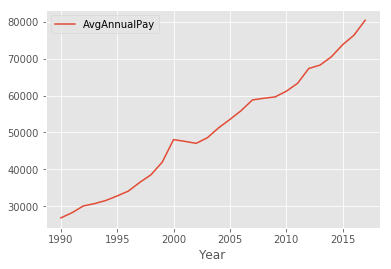

In [140]:
WageGrowthDf = WagesBayAreaDf[["Year","AvgAnnualPay"]]
WageGrowthDf.set_index("Year",inplace = True)
WageGrowthDf.plot()

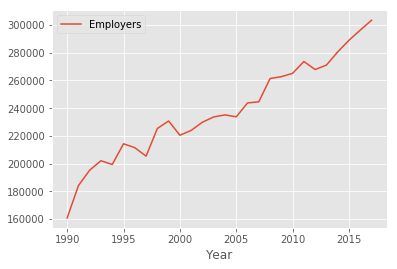

In [141]:
EmployerGrowthDf = WagesBayAreaDf[["Year","Employers"]]
EmployerGrowthDf.set_index("Year",inplace = True)
EmployerGrowthDf.plot()